In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import *   
import matplotlib.pyplot as plt

import mlflow 
import mlflow.sklearn

In [11]:
# Carregando base de dados. 
df = pd.read_csv('data/Credit.csv')

print(df.shape)

df.head()

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [12]:
# Tratamento de dados: transformando em dados numéricos. 

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes 

In [13]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [14]:
# Separando os previsores das classes; # transformando 

previsores = df.iloc[:,0:20].values #observe que o intervalo realmente é de 0 20 por que ele ignora o ultimo valor
classe = df.iloc[:,20].values 

In [15]:
previsores

array([[ 2,  6,  1, ...,  1,  1,  1],
       [ 1, 48,  3, ...,  1,  0,  1],
       [ 0, 12,  1, ...,  2,  0,  1],
       ...,
       [ 0, 12,  3, ...,  1,  0,  1],
       [ 2, 45,  3, ...,  1,  1,  1],
       [ 1, 45,  1, ...,  1,  0,  1]])

In [ ]:
classe

In [16]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size=0.3, random_state=123)

/home/demetrios/Downloads/MLOps/mlflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/demetrios/Downloads/MLOps/mlflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Modelo  4bd8d6287e3642d89ddacdee4f7a0f68
0.7766666666666666


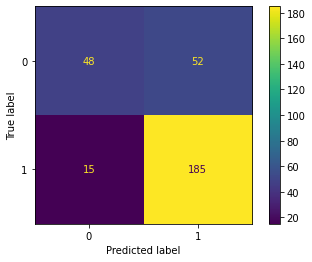

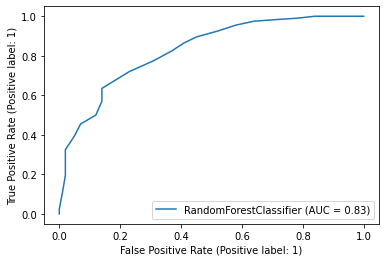

In [18]:
# iniciando ml flow
mlflow.set_experiment("RF_experimento")

# Definindo o contexto mlflow: 
with mlflow.start_run():
    
    n =30
    # criando o objeto: 
    # n_estimators -> número de árvores que o Random Forest vai induzir. 
    modelorf = RandomForestClassifier(n_estimators=n)
    

    #Criando modelo: 
    modelorf.fit(X_treinamento, y_treinamento)

    #Fazendo previsões objeto
    previsoes = modelorf.predict(X_teste)
    
    # Registrando hiperparametros (logs)
    mlflow.log_param("n_estimators", n)

    # Métricas:  
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc_1 = roc_auc_score(y_teste, previsoes) #area sobre a curva
    log = log_loss(y_teste, previsoes)
    
    
    # Registrar métricas: 
    mlflow.log_metric("Acurácia", acuracia)
    mlflow.log_metric("recal", recall)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("auc", auc_1)
    mlflow.log_metric("log", log)
    
  
    
    # Gerando gráficos: 
    confusion = plot_confusion_matrix(modelorf, X_teste, y_teste)
    plt.savefig("ConfusionRF.png") #salvar o gráfico
    
    roc = plot_roc_curve(modelorf, X_teste, y_teste)
    plt.savefig("rocRF.png")
    
    # salvando comoo artefato do MlFlow: 
    mlflow.log_artifact("ConfusionRF.png")
    mlflow.log_artifact("rocRF.png")
    
    #Salvando o modelo criando com sklearn passando o objeto como parâmetro: 
    mlflow.sklearn.log_model(modelorf, "Modelo de Random Forest")
    
    # Informação de execução: 
    print("Modelo ", mlflow.active_run().info.run_uuid)

    print(acuracia)
    
mlflow.end_run()